In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy.random as nrand

from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


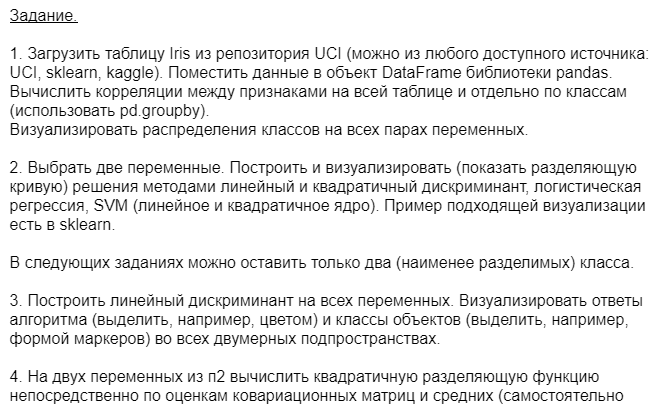
![Alt text](image.png)

![Alt text](image.png)

# задание 1

In [70]:
# Загружаем данные Iris из scikit-learn
iris = load_iris()

print(iris['target_names'])

# Создаем DataFrame из данных
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
print(data)

['setosa' 'versicolor' 'virginica']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1              

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

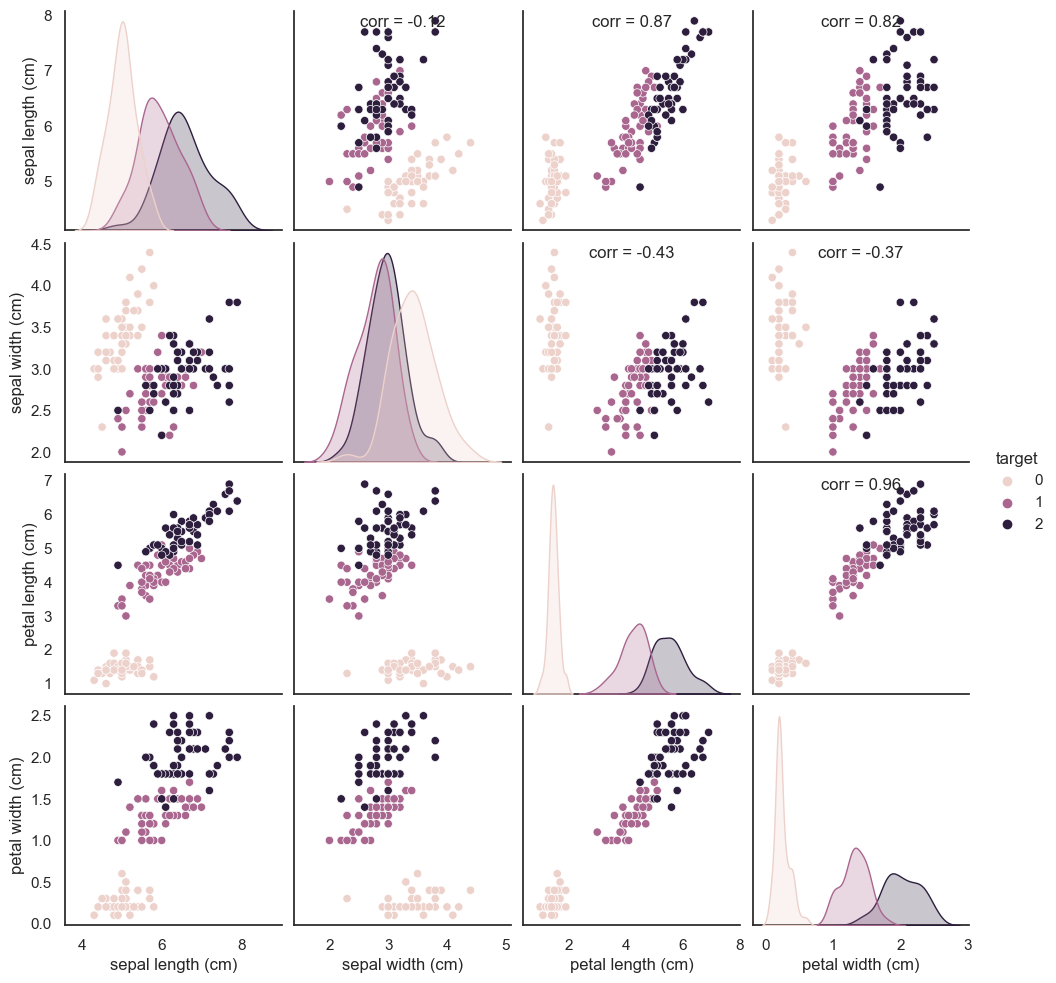

In [71]:
# Вычисляем корреляции между признаками на всей таблице
correlation_matrix = data.corr()

# Вычисляем корреляции между признаками по классам, используя pd.groupby
# сначала группируем данные по столбцу target, а затем вычисляем корреляцию внутри каждой группы.
class_correlations = data.groupby('target').corr()

class_mapping = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}

class_mapping = {
    "sepal length": "длина чашелистика",
    "sepal width": "ширина чашелистика",
    "petal length ": "длина лепестка",
    "petal width": "ширина лепестка"
}


# Визуализируем распределения классов на всех возможных попарных комбинациях признаков.
# Каждая точка на графике будет иметь цвет, соответствующий классу, 
# что позволяет увидеть, как различные классы распределены по признакам.
#  diag_kind='kde' указывает, что на диагонали будет отображаться оценка плотности ядра 
# (Kernel Density Estimation, KDE) для каждой переменной.
sns.set(style="white")
g = sns.pairplot(data, hue='target', diag_kind='kde')

# Добавим прямые с коэффициентами корреляции
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].annotate(
        f"corr = {correlation_matrix.iloc[i, j]:.2f}", 
        (0.5, 0.95), 
        xycoords='axes fraction', 
        ha='center', 
        va='center'
    )

# На главной диагонали находятся гистограммы каждого признака - распределение значений этого признака.

# Вне главной диагонали - это попарные графики для каждой комбинации пары признаков. 
# верхний левый график показывает взаимное распределение между длиной чашелистника и шириной чашелистника.

plt.show()

# задание 2


In [72]:
# Загрузка данных Iris
X = iris.data[:, :2]  # Выбираем первые два признака
y = iris.target

In [73]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных (центрирование и масштабирование)
# делаем так что бы данные имели среднее значение 
# центрирование - равное нулю и стандартное отклонение (масштабирование) равное единице. 
# Стандартизация помогает сделать данные более интерпретируемыми и улучшить производительность алгоритмов

# Центрирование: Для каждого признака из общего набора данных вычитается его среднее значение. 
# Это приводит к тому, что среднее значение признака становится равным нулю.

# Масштабирование: После центрирования каждое значение признака делится на его стандартное отклонение. 
# Это делает дисперсию (разброс) значений признака равной единице.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание моделей и их обучение
lda = LinearDiscriminantAnalysis() # линейный дискриминант,
qda = QuadraticDiscriminantAnalysis() # квадратичный дискриминант,
logreg = LogisticRegression() # логистическая регрессия
svm_linear = SVC(kernel='linear') # линейное
svm_rbf = SVC(kernel='rbf') # квадратичное 

models = [lda, qda, logreg, svm_linear, svm_rbf]
model_names = ['LDA', 'QDA', 'Logistic Regression', 'SVM (Linear)', 'SVM (RBF)']

# 

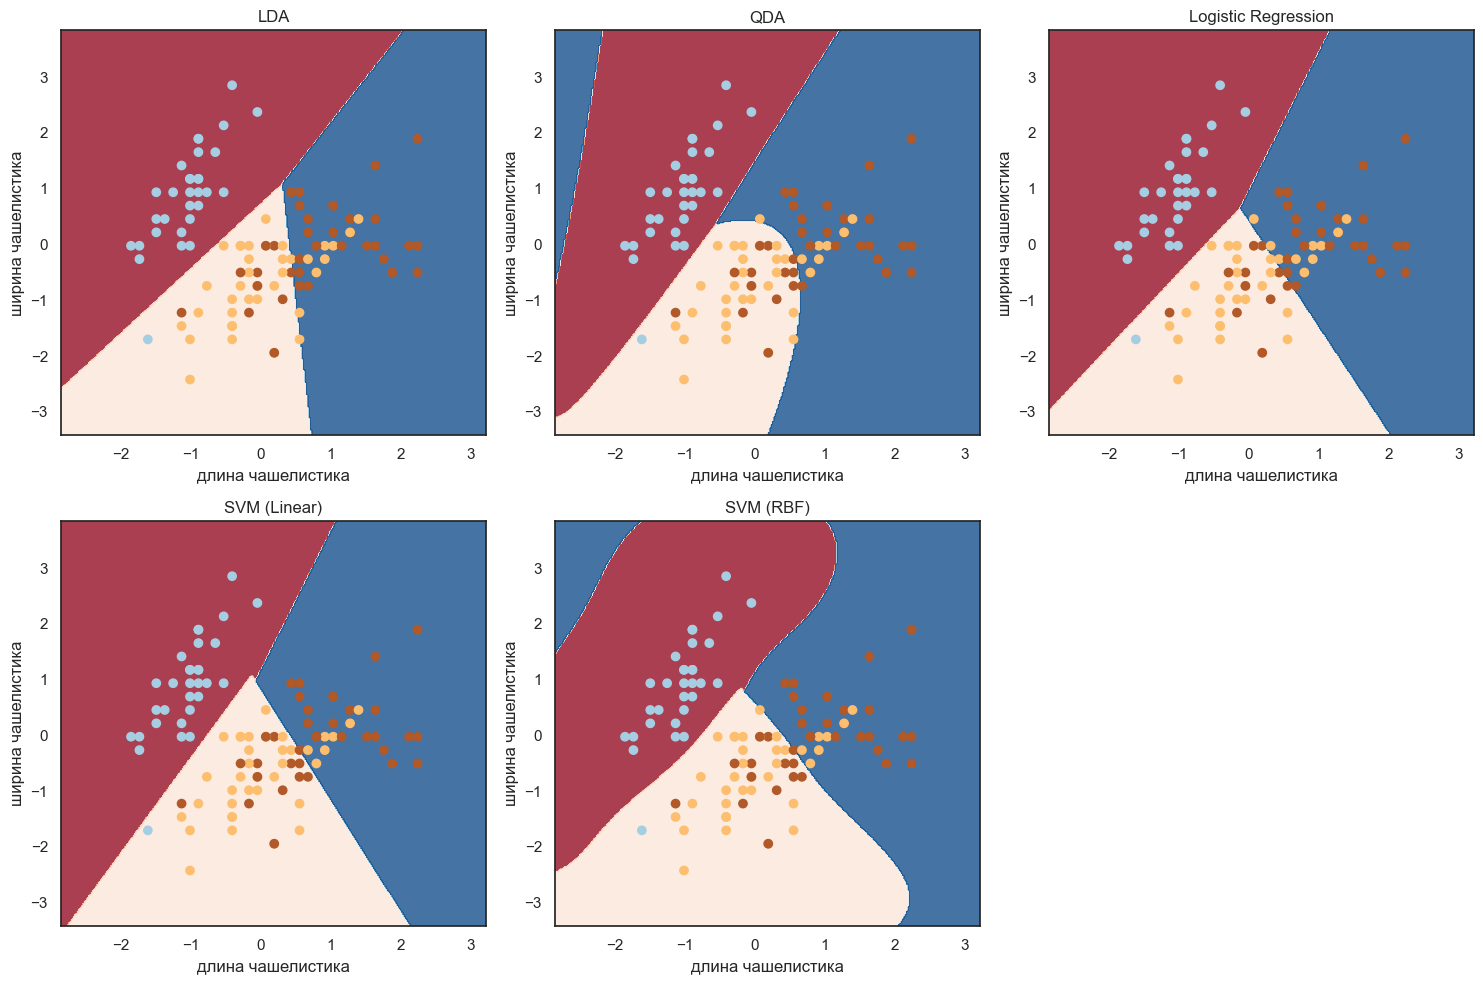

In [74]:
# Обучение моделей и визуализация разделяющих кривых
plt.figure(figsize=(15, 10))
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    
    plt.subplot(2, 3, i + 1)
    plt.title(model_names[i])
    
    # Создание сетки для визуализации разделяющей кривой
    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # наше предсказание
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    
    # Визуализация точек обучающего набора
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel('длина чашелистика')
    plt.ylabel('ширина чашелистика')

plt.tight_layout()
plt.show()

# задание 3

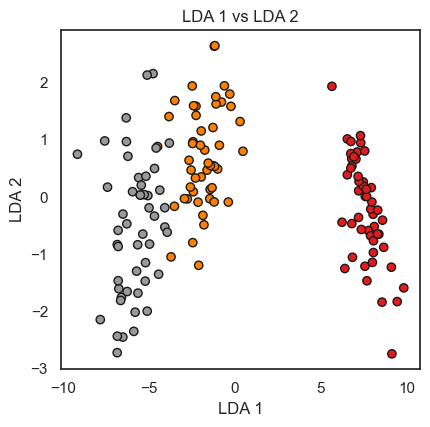

In [75]:
X = iris.data  # Все признаки
y = iris.target  # Классы

lda = LinearDiscriminantAnalysis() # линейного дискриминанта
# LDA - это метод уменьшения размерности данных, который используется для проекции исходных признаков 
# в новое пространство меньшей размерности таким образом, чтобы максимизировать разделение классов (групп) данных. 
# LDA стремится найти такие компоненты (называемые линейными дискриминантами), которые максимизируют разброс 
# между классами и минимизируют разброс внутри классов.

# Обучение модели
lda.fit(X, y)
# Получение преобразованных данных в двуцмерное пространство
X_lda = lda.transform(X)

# Визуализация ответов и классов объектов
plt.figure(figsize=(12, 8))
target_names = iris.target_names

for i in range(X_lda.shape[1]):
    for j in range(i + 1, X_lda.shape[1]):
        plt.subplot(2, 3, i * (X_lda.shape[1] - 1) + j)
        plt.scatter(X_lda[:, i], X_lda[:, j], c=y, cmap=plt.cm.Set1, edgecolor='k')
        plt.xlabel(f'LDA {i + 1}')
        plt.ylabel(f'LDA {j + 1}')
        plt.title(f'LDA {i + 1} vs LDA {j + 1}')

plt.tight_layout()
plt.show()

# Визуализировали, как линейный дискриминант проецирует данные в двумерное пространство, 
# и как объекты разных классов разделяются в этом пространстве.

# LDA - это метод уменьшения размерности данных, который используется для проекции исходных признаков в новое 
# пространство меньшей размерности таким образом, чтобы максимизировать разделение классов (групп) данных. 
# LDA стремится найти такие компоненты (называемые линейными дискриминантами), 
# которые максимизируют разброс между классами и минимизируют разброс внутри классов.

# задание 4

![Alt text](image-2.png)

In [76]:
# Функция для вычисления квадратичной разделяющей функции
def quadratic_discriminant_function(x, cov_matrix, mean_vector, prior_prob):
    x_minus_mean = x - mean_vector
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    log_det_cov_matrix = np.log(np.linalg.det(cov_matrix))
    return -0.5 * (x_minus_mean.T @ inv_cov_matrix @ x_minus_mean) - 0.5 * log_det_cov_matrix + np.log(prior_prob)

def get_res_4_task(X, y):
    # Разделяем данные по классам
    X_class_0 = X[y == 0]
    X_class_1 = X[y == 1]
    X_class_2 = X[y == 2]

    # Оценки ковариационных матриц для каждого класса
    cov_matrix_0 = np.cov(X_class_0.T)
    cov_matrix_1 = np.cov(X_class_1.T)
    cov_matrix_2 = np.cov(X_class_2.T)

    # Средние значения признаков для каждого класса
    mean_vector_0 = np.mean(X_class_0, axis=0)
    mean_vector_1 = np.mean(X_class_1, axis=0)
    mean_vector_2 = np.mean(X_class_2, axis=0)

    # Априорные вероятности для каждого класса (предполагаем равные вероятности)
    prior_probability = [1/3, 1/3, 1/3]

    # Генерация сетки точек для визуализации разделяющей кривой
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Вычисление значений квадратичной разделяющей функции для каждого класса
    Z_0 = np.zeros_like(xx)
    Z_1 = np.zeros_like(xx)
    Z_2 = np.zeros_like(xx)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            x = np.array([xx[i, j], yy[i, j]])
            Z_0[i, j] = quadratic_discriminant_function(x, cov_matrix_0, mean_vector_0, prior_probability[0])
            Z_1[i, j] = quadratic_discriminant_function(x, cov_matrix_1, mean_vector_1, prior_probability[1])
            Z_2[i, j] = quadratic_discriminant_function(x, cov_matrix_2, mean_vector_2, prior_probability[2])

    return X[:, 0], X[:, 1], y, [Z_0, Z_1, Z_2]

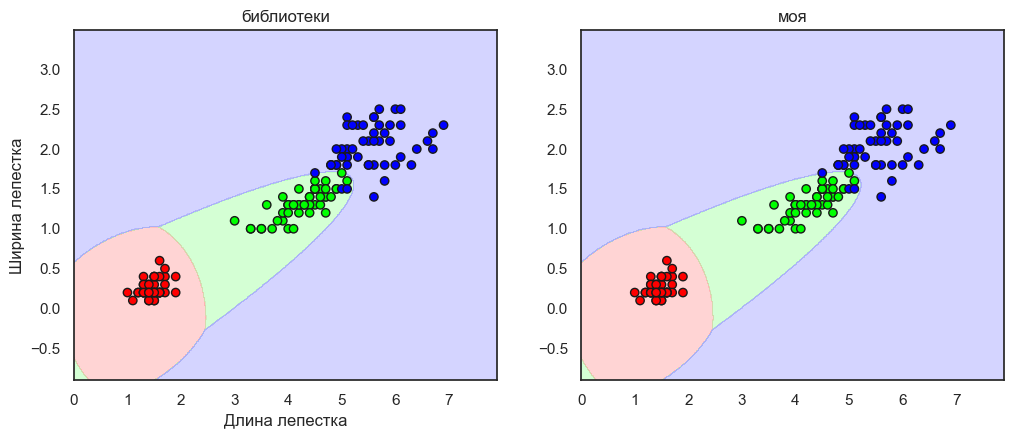

In [77]:
# Загрузка данных Iris
iris = load_iris()
X = iris.data[:, [2, 3]]  # два признака: длина лепестка и ширина лепестка
y = iris.target

qda_my_X0, qda_my_X1, qda_my_y, qda_my_z = get_res_4_task(X, y) # моя QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Генерация сетки точек для визуализации разделяющей кривой
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация разделяющей кривой и данных
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig = plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.title('библиотеки')


plt.subplot(222)
plt.contourf(xx, yy, np.argmax(qda_my_z, axis=0), cmap=cmap_background, alpha=0.5)
plt.scatter(qda_my_X0, qda_my_X1, c=qda_my_y, cmap=cmap_points, edgecolor='k')
plt.title('моя')
plt.show()